# All Sites Random Forest
## Notebook #1
* random forest run with all elevations together 
* created the PDP plot used to determine elevation bins

created by Cassie Lumbrazo\
date: July 2023\
python environment: **raster**


In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus 
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [3]:
# Try opening 1 at a time, subsampling, then making a tidy dataset and closing
# ds_ce = xr.open_dataset('/home/lumbraca/raster/data/cer_model_cleandata_create_netcdf.nc')
# ds_sr = xr.open_dataset('/home/lumbraca/raster/data/sr_model_cleandata_create_netcdf.nc')
# ds_fl = xr.open_dataset('/home/lumbraca/raster/data/fl_model_cleandata_create_netcdf.nc')

# Sample Dataset First 

#### We want to use a random forest generator to determine what best predictors for snow depth 
* ds.dem
* ds.dah
* ds.dce
* ds.tpi

maybe, 
* ds.slope
* ds.aspect

In [4]:
# decide how big to sample 
sample_number = 100

### Cle Elum Ridge

In [5]:
# Read the dataset 1 at a time
ds = xr.open_dataset('/home/lumbraca/raster/data/cer_model_cleandata_create_netcdf.nc')

# Flatten
ds_snowdepth = ds.snowdepth.values.flatten()
ds_dem = ds.dem.values.flatten()
ds_dah = ds.dah.values.flatten() 
ds_dce = ds.dce.values.flatten()
ds_tpi = ds.tpi.values.flatten() 

ds_dah = ds_dah * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis
ds_tpi = ds_tpi * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis

# Subsample
num = sample_number

ds_snowdepth = ds_snowdepth[::num] #start:stop:step
ds_dem = ds_dem[::num] 
ds_dce = ds_dce[::num] 
ds_dah = ds_dah[::num] 
ds_tpi = ds_tpi[::num] 

# Create DF for the site 
df_ce = pd.DataFrame({'snowdepth': ds_snowdepth,
                   'dem': ds_dem, 
                   'dah': ds_dah, 
                   'tpi': ds_tpi,
                   'dce': ds_dce})

# random forest cannot have any na values
df_ce.dropna(how='any', inplace=True) # it has to be everything 

# And close the large netcdf 
ds.close()

### Sassie Ridge

In [6]:
# Read the dataset 1 at a time
ds = xr.open_dataset('/home/lumbraca/raster/data/sr_model_cleandata_create_netcdf.nc')

# Flatten
ds_snowdepth = ds.snowdepth.values.flatten()
ds_dem = ds.dem.values.flatten()
ds_dah = ds.dah.values.flatten() 
ds_dce = ds.dce.values.flatten()
ds_tpi = ds.tpi.values.flatten() 

ds_dah = ds_dah * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis
ds_tpi = ds_tpi * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis

# Subsample
num = sample_number

ds_snowdepth = ds_snowdepth[::num] #start:stop:step
ds_dem = ds_dem[::num] 
ds_dce = ds_dce[::num] 
ds_dah = ds_dah[::num] 
ds_tpi = ds_tpi[::num] 

# Create DF for the site 
df_sr = pd.DataFrame({'snowdepth': ds_snowdepth,
                   'dem': ds_dem, 
                   'dah': ds_dah, 
                   'tpi': ds_tpi,
                   'dce': ds_dce})

# random forest cannot have any na values
df_sr.dropna(how='any', inplace=True) # it has to be everything 

# And close the large netcdf 
ds.close()

### Fish Lake

In [7]:
# Read the dataset 1 at a time
ds = xr.open_dataset('/home/lumbraca/raster/data/fl_model_cleandata_create_netcdf.nc')

# Flatten
ds_snowdepth = ds.snowdepth.values.flatten()
ds_dem = ds.dem.values.flatten()
ds_dah = ds.dah.values.flatten() 
ds_dce = ds.dce.values.flatten()
ds_tpi = ds.tpi.values.flatten() 

ds_dah = ds_dah * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis
ds_tpi = ds_tpi * 100 # we want to multiply this by 100 to perserve the 2 decimal places for analysis

# Subsample
num = sample_number

ds_snowdepth = ds_snowdepth[::num] #start:stop:step
ds_dem = ds_dem[::num] 
ds_dce = ds_dce[::num] 
ds_dah = ds_dah[::num] 
ds_tpi = ds_tpi[::num] 

# Create DF for the site 
df_fl = pd.DataFrame({'snowdepth': ds_snowdepth,
                   'dem': ds_dem, 
                   'dah': ds_dah, 
                   'tpi': ds_tpi,
                   'dce': ds_dce})

# random forest cannot have any na values
df_fl.dropna(how='any', inplace=True) # it has to be everything 

# And close the large netcdf 
ds.close()

In [8]:
## Look at any of these datasets to make sure it worked 
# df_ce
# df_fl
# df_sr

### Merge all sites together into 1 dataframe

In [9]:
# merge the dataframes into 1 
df = pd.concat([df_ce, df_sr, df_fl], axis=0)
df

snowdepth          dem        dah         tpi       dce
9766     0.150316   822.718445 -29.726843   57.710022 -6.656933
9891     0.249957   822.849731 -28.318237  101.582420 -5.855017
10016    0.283146   822.890076 -25.693590   87.635605 -2.044661
10141    0.358304   823.426514 -21.672443  212.193848 -2.743200
10266    0.120551   824.171204 -23.570675  389.375916 -3.879471
...           ...          ...        ...         ...       ...
534826   4.139952  1665.657593  33.969559   49.022217 -0.914400
534899   3.761482  1665.484253  30.955780   14.871216  0.914400
534972   3.149203  1665.414917  29.152557   24.814209 -1.828800
536796   4.004667  1658.413940  11.439165  -85.257019  7.141693
536869   3.901827  1658.688599  10.046226  -45.071289  7.141693

[614747 rows x 5 columns]

Text(31.875, 0.5, 'snow depth (m)')

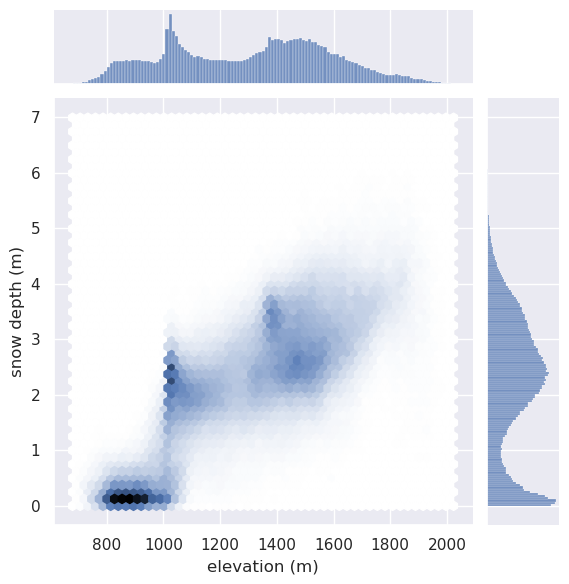

In [21]:
# plot dem by snow depth 
sns.jointplot(x=df.dem, y=df.snowdepth, kind="hex")
plt.xlabel('elevation (m)')
plt.ylabel('snow depth (m)')


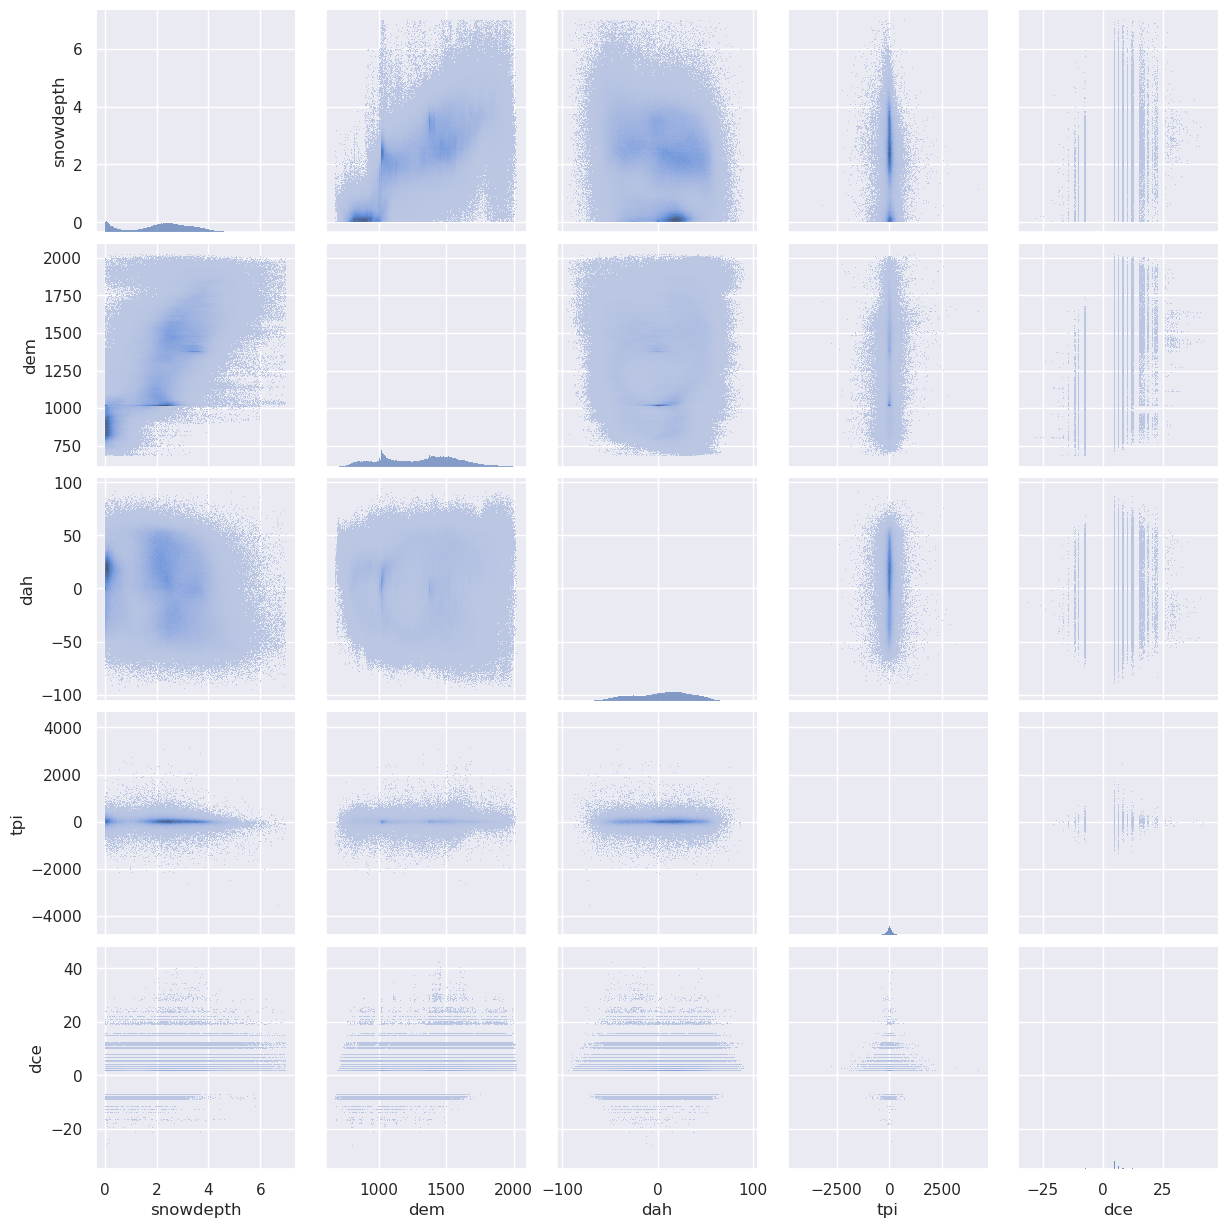

In [10]:
sns.pairplot(df, kind='hist') # kind="hist"

## Prepare the dataset for Random Forest Model

In [13]:
df_int = df.copy(deep=True)
df_int['snowdepth'] = df_int['snowdepth'].astype(int)
df_int['dem'] = df_int['dem'].astype(int)
df_int['dah'] = df_int['dah'].astype(int)
df_int['dce'] = df_int['dce'].astype(int)
df_int['tpi'] = df_int['tpi'].astype(int)

df_int.head()

snowdepth  dem  dah  tpi  dce
9766           0  822  -29   57   -6
9891           0  822  -28  101   -5
10016          0  822  -25   87   -2
10141          0  823  -21  212   -2
10266          0  824  -23  389   -3

In [23]:
# create the x, variables, columns
X = df_int.drop(columns=['snowdepth'])
X.head()

dem  dah  tpi  dce
9766   822  -29   57   -6
9891   822  -28  101   -5
10016  822  -25   87   -2
10141  823  -21  212   -2
10266  824  -23  389   -3

In [24]:
# create the y, predictor, column
y = df_int.snowdepth
y.head()

9766     0
9891     0
10016    0
10141    0
10266    0
Name: snowdepth, dtype: int64

In [25]:
# x.describe()
X.isnull().values.any()
y.isnull().values.any()

False

# Run with All Elevation
## 1. Decision Tree Classifier 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# test_size : taking 50% of the dataset to make the decision ()
# then, decision tree goes through this again, but only taking 20% each time 
# random_state as an int, to decide how to recreate results 

In [16]:
# check the size of train dataset, should be 20% (or test_size) based on full test 
len(X_train) 
len(X_test)

307374

In [17]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
clf = clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print('Accuracy on train data is %.2f' % (accuracy_score(y_train, y_pred_train)))

y_pred_test = clf.predict(X_test)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred_test)))

Accuracy on train data is 0.56
Accuracy on test data is 0.56


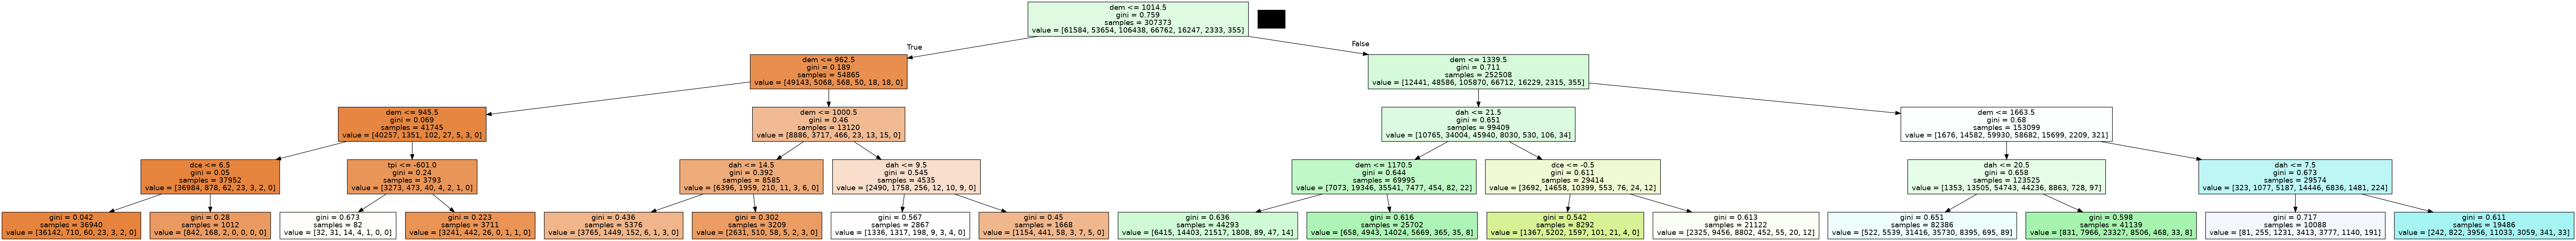

In [18]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## 2. Emsemble Random Forest Classifier 

In [19]:
# n_estimators: the number of times you want to run the decision trees 
# 'n_estimators': [100,250,500]
# 'max_depth':[3,4]
# not sure what "cv" is, but seems to give a warning. needs to be = to number of variables predicting

parameters = {'n_estimators': [30], 'max_depth':[3]}
clf = GridSearchCV(ensemble.RandomForestClassifier(n_jobs=5), parameters) #cv=3

clf.fit(X=X_train,y=y_train.values.ravel())
tree_model = clf.best_estimator_

y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
print('Accuracy on training data is %.2f' % (accuracy_score(y_train, y_pred_train)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred_test)))
print(clf.best_params_)

Accuracy on training data is 0.55
Accuracy on test data is 0.55
{'max_depth': 3, 'n_estimators': 30}


In [20]:
# clf.feature_importances_ #importance of each variable 
clf.feature_names_in_


array(['dem', 'dah', 'tpi', 'dce'], dtype=object)

In [21]:
estimator = tree_model.estimators_[3]
estimator

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1972995144)

In [22]:
tree.export_graphviz(estimator, out_file='ensemble_tree.dot', 
                feature_names = X.columns,
                # class_names = ('no_veg', 'veg'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'ensemble_tree.dot', '-o', 'ensemble_tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'ensemble_tree.png')

In [23]:
# code taken from Hannah's notebook... but it's not working. something internal sklearn
# dot_data = tree.export_graphviz(tree_model, feature_names=X.columns, filled=True, out_file=None) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# Image(graph.create_png())

## 3. Partial Dependence Plots

https://scikit-learn.org/stable/modules/partial_dependence.html

Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest, marginalizing over the values of all other input features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest.

The sklearn.inspection module provides a convenience function from_estimator to create one-way and two-way partial dependence plots. 

In the below example we show how to create a grid of partial dependence plots: 
* two one-way PDPs for the features 0
* 1 and a two-way PDP between the two features:

In [10]:
# maybe these plots need help... size is super annoying. need to fix. 
sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

In [11]:
df

snowdepth          dem        dah         tpi       dce
9766     0.150316   822.718445 -29.726843   57.710022 -6.656933
9891     0.249957   822.849731 -28.318237  101.582420 -5.855017
10016    0.283146   822.890076 -25.693590   87.635605 -2.044661
10141    0.358304   823.426514 -21.672443  212.193848 -2.743200
10266    0.120551   824.171204 -23.570675  389.375916 -3.879471
...           ...          ...        ...         ...       ...
534826   4.139952  1665.657593  33.969559   49.022217 -0.914400
534899   3.761482  1665.484253  30.955780   14.871216  0.914400
534972   3.149203  1665.414917  29.152557   24.814209 -1.828800
536796   4.004667  1658.413940  11.439165  -85.257019  7.141693
536869   3.901827  1658.688599  10.046226  -45.071289  7.141693

[614747 rows x 5 columns]

In [ ]:
# Code to get the partial plots for variable dependence 
# I do not know if we need to rerun with the Gradient Boosting Classifier, but instead plot the partial dependaence with the random forest model
# going to comment it out for now, and then try to get the partial dependence plot without it 

clf_GB = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=0, n_jobs=4).fit(X, y) # small amount of n-estimators for now
# features = [0, 1, (0, 1)] # this means, dem, then dah, then dem vs dah (features in X)

features = [0, 1, 2, 3]  # this is all 4 features 

PartialDependenceDisplay.from_estimator(clf_GB, X, features, kind='individual', target=0) # The same parameter target is used to specify the target in multi-output regression settings.

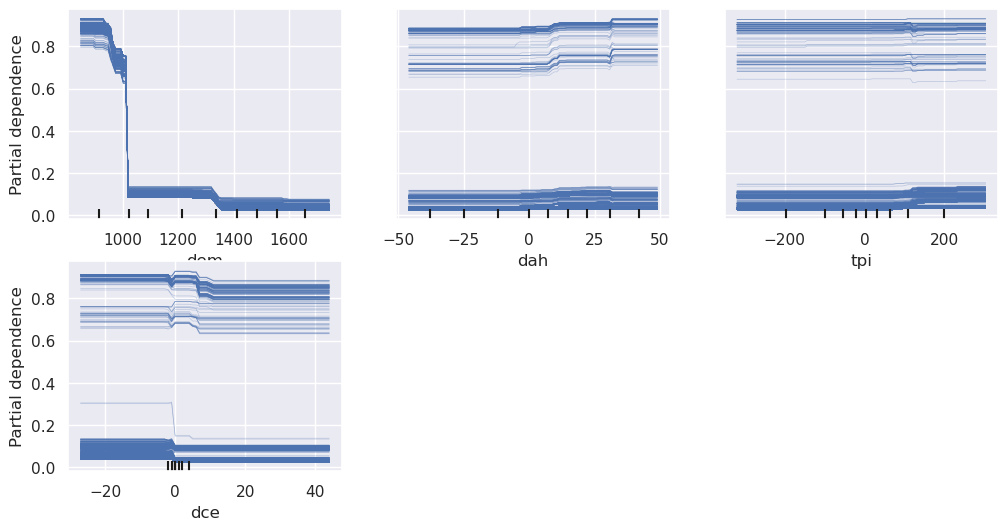

In [26]:
# Code to get the partial plots for variable dependence 
# I do not know if we need to rerun with the Gradient Boosting Classifier, but instead plot the partial dependaence with the random forest model
# going to comment it out for now, and then try to get the partial dependence plot without it 

# clf = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=0,).fit(X, y) # small amount of n-estimators for now
# features = [0, 1, (0, 1)] # this means, dem, then dah, then dem vs dah (features in X)

features = [0, 1, 2, 3]  # this is all 4 features 

PartialDependenceDisplay.from_estimator(clf, X, features, kind='individual', target=0) # The same parameter target is used to specify the target in multi-output regression settings.

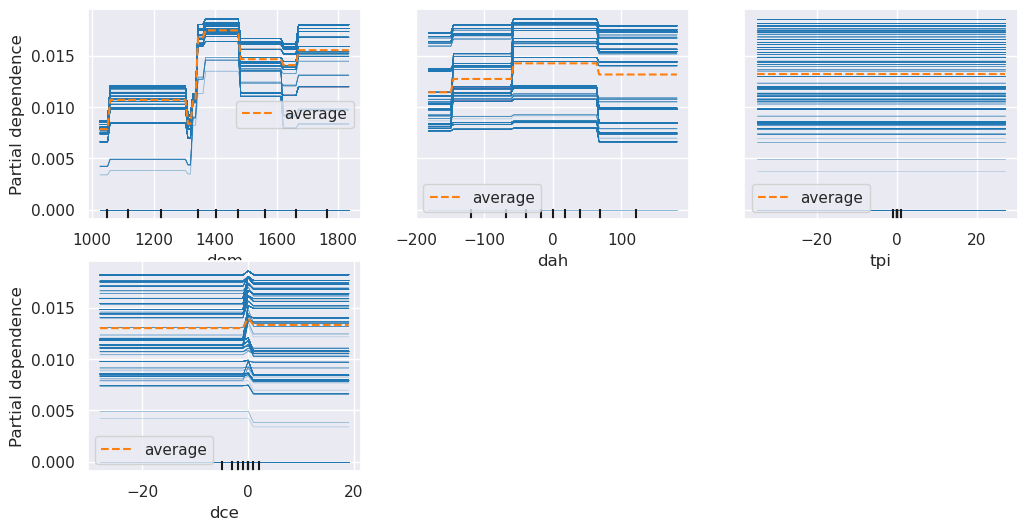

In [ ]:
PartialDependenceDisplay.from_estimator(clf, X, features, kind='both', target=0) # The same parameter target is used to specify the target in multi-output regression settings.

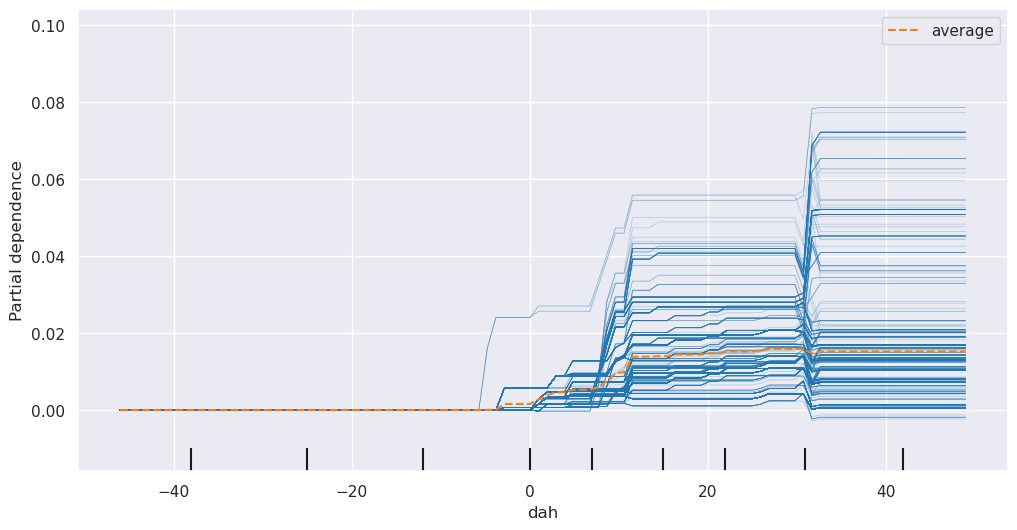

In [29]:
# just looking at 1 feature at a time 
plt.rcParams['figure.figsize'] = [12,6] #overriding size
features = [1]
PartialDependenceDisplay.from_estimator(clf, X, features, target=0, kind='both', centered=True)

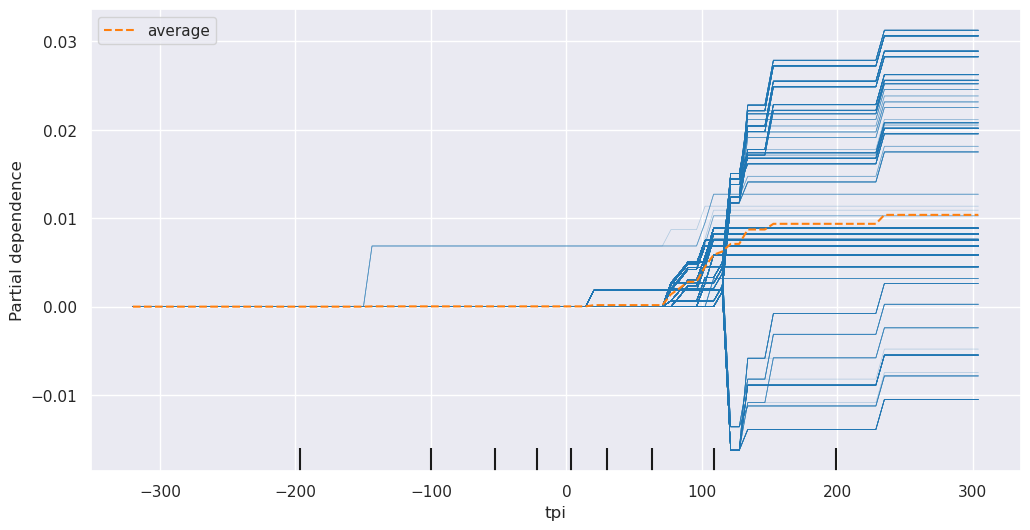

In [30]:
# just looking at 1 feature at a time 
plt.rcParams['figure.figsize'] = [12,6] #overriding size

PartialDependenceDisplay.from_estimator(clf, X, features, target=0, kind='both', centered=True)

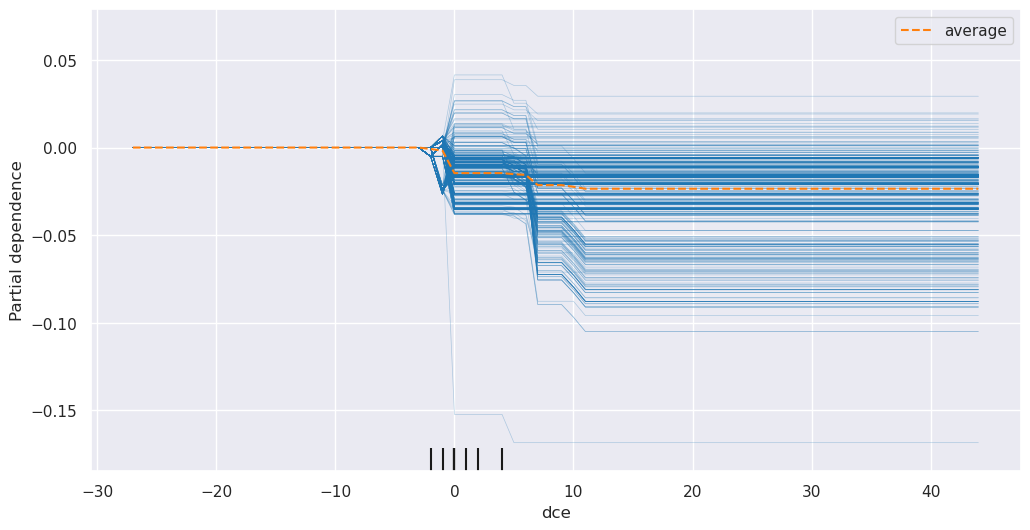

In [31]:
# just looking at 1 feature at a time 
plt.rcParams['figure.figsize'] = [12,6] #overriding size
features = [3]
PartialDependenceDisplay.from_estimator(clf, X, features, target=0, kind='both', centered=True)

# Run with All Elevation
## 1. Decision Tree Classifier 

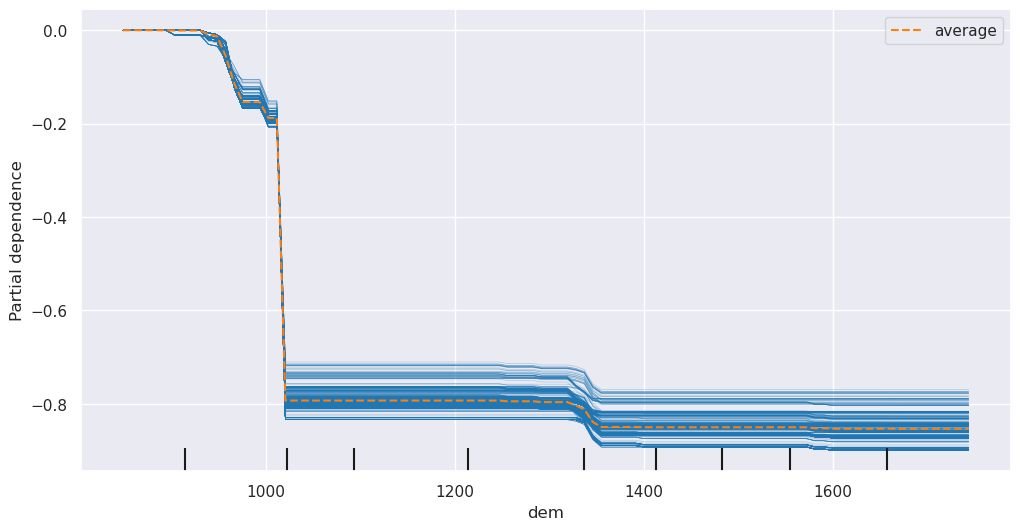

In [27]:
# just looking at 1 feature at a time 
plt.rcParams['figure.figsize'] = [12,6] #overriding size
features = [0]
PartialDependenceDisplay.from_estimator(clf, X, features, target=0, kind='both', centered=True)

(810.0, 1780.0)

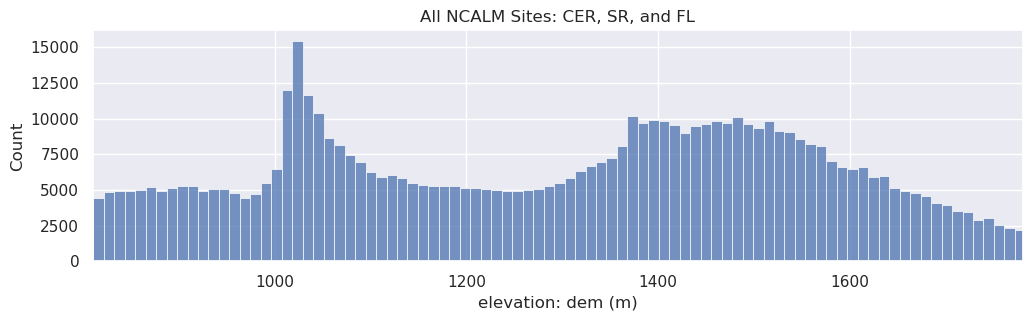

In [13]:
plt.rcParams['figure.figsize'] = [12,3] #overriding size
sns.histplot(data=df['dem'])

# Setting lines at the split values based on the PP
# plt.axvline(x=1020, color='grey', alpha=.8)
# plt.axvline(x=1340, color='grey', alpha=.8)
# plt.axvline(x=1480, color='grey', alpha=.5)
# plt.axvline(x=1620, color='grey', alpha=.5)

plt.title('All NCALM Sites: CER, SR, and FL')
plt.xlabel('elevation: dem (m)')
plt.xlim([810, 1780])

# Bin Elevation Bands , MOVING TO NOTEBOOKS 2 and 3 for this
Using the bins found above by running the model with and looking at the PDP with elevation


* bin 1 is the low elevation zone of elevations less than 1100 meters
* bin 2 is the middle elevation zone from 1100 to 1340 meters
* bin 3 is the high elevation zone greater than 1340 meters

In [14]:
# break the data down by elevation bands 
df_bin1 = df_int.where(df_int.dem < 1100)                          # less than 1300
df_bin2 = df_int.where((df_int.dem >= 1100) & (df_int.dem < 1340)) # greater than or = 1300, less than 1370
df_bin3 = df_int.where(df_int.dem >= 1340)                         # greater than than 1370 

# creating bins creates nan, so remove all for random forest 
df_bin1.dropna(how='any', inplace=True) # it has to be everything
df_bin2.dropna(how='any', inplace=True) # it has to be everything 
df_bin3.dropna(how='any', inplace=True) # it has to be everything 

# # 1. THIS SECTION
# # create the x, variables, columns
# X_bin1 = df_bin1.drop(columns=['snowdepth'])
# X_bin2 = df_bin2.drop(columns=['snowdepth'])
# X_bin3 = df_bin3.drop(columns=['snowdepth'])

# 2. OR THIS SECTION, if you want to remove dem from the random forest model 
# create the x, variables, columns
X_bin1 = df_bin1.drop(columns=['snowdepth', 'dem'])
X_bin2 = df_bin2.drop(columns=['snowdepth', 'dem'])
X_bin3 = df_bin3.drop(columns=['snowdepth', 'dem'])

# 3. Then, with either 1 or 2, run 3 
# create the y, predictor, column
y_bin1 = df_bin1.snowdepth
y_bin2 = df_bin2.snowdepth
y_bin3 = df_bin3.snowdepth

In [15]:
# check to make sure.. 
X_bin1.head()

dah    tpi  dce
9766  -29.0   57.0 -6.0
9891  -28.0  101.0 -5.0
10016 -25.0   87.0 -2.0
10141 -21.0  212.0 -2.0
10266 -23.0  389.0 -3.0

## 1.  Random Forest
### Bin 1

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bin1, y_bin1, test_size=0.5, random_state=0)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_bin2, y_bin2, test_size=0.5, random_state=0)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X_bin3, y_bin3, test_size=0.5, random_state=0)

parameters = {'n_estimators': [30], 'max_depth':[3], 'n_jobs':[4]} # max depth of 3 without elevation  n_jobs=-1
# clf = GridSearchCV(ensemble.RandomForestClassifier(), parameters) #cv=3

# trying to write it like this to get the n_jobs parameter to work 
# clf1  = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1)
clf1 = GridSearchCV(ensemble.RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=4)) #cv=3
# clf1  = ensemble.RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=4)

clf1.fit(X=X_train1,y=y_train1.values.ravel())
tree_model1 = clf1.best_estimator_

y_pred_train1 = tree_model1.predict(X_train1)
y_pred_test1 = tree_model1.predict(X_test1)
print('Accuracy on training data is %.2f' % (accuracy_score(y_train1, y_pred_train1)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test1, y_pred_test1)))
print(clf1.best_params_)

TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'

In [84]:
# # clf.feature_importances_ #importance of each variable 
# clf.feature_names_in_

estimator1 = tree_model1.estimators_[3]
estimator1


DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2022401362)

In [85]:
tree.export_graphviz(estimator1, out_file='ensemble_tree1.dot', 
                feature_names = X_bin1.columns,
                # class_names = ('no_veg', 'veg'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'ensemble_tree1.dot', '-o', 'ensemble_tree1.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'ensemble_tree1.png')

### Bin 2

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bin1, y_bin1, test_size=0.5, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_bin2, y_bin2, test_size=0.5, random_state=0)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X_bin3, y_bin3, test_size=0.5, random_state=0)

# parameters = {'n_estimators': [30], 'max_depth':[3]} # max depth of 3 without elevation  n_jobs=-1
# clf = GridSearchCV(ensemble.RandomForestClassifier(), parameters) #cv=3

# trying to write it like this to get the n_jobs parameter to work 
clf2  = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=4)

clf2.fit(X=X_train2,y=y_train2.values.ravel())
tree_model2 = clf2.best_estimator_

y_pred_train2 = tree_model2.predict(X_train2)
y_pred_test2 = tree_model2.predict(X_test2)
print('Accuracy on training data is %.2f' % (accuracy_score(y_train2, y_pred_train2)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test2, y_pred_test2)))
print(clf2.best_params_)

In [ ]:
# # clf.feature_importances_ #importance of each variable 
# clf.feature_names_in_

estimator2 = tree_model2.estimators_[3]
estimator2


In [ ]:
tree.export_graphviz(estimator2, out_file='ensemble_tree2.dot', 
                feature_names = X_bin1.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'ensemble_tree2.dot', '-o', 'ensemble_tree2.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'ensemble_tree2.png')

### Bin 3

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bin1, y_bin1, test_size=0.5, random_state=0)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_bin2, y_bin2, test_size=0.5, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_bin3, y_bin3, test_size=0.5, random_state=0)

# parameters = {'n_estimators': [30], 'max_depth':[3]} # max depth of 3 without elevation  n_jobs=-1
# clf = GridSearchCV(ensemble.RandomForestClassifier(), parameters) #cv=3

# trying to write it like this to get the n_jobs parameter to work 
clf3  = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=4)

clf3.fit(X=X_train3,y=y_train3.values.ravel())
tree_model3 = clf3.best_estimator_

y_pred_train3 = tree_model3.predict(X_train3)
y_pred_test3 = tree_model3.predict(X_test3)
print('Accuracy on training data is %.2f' % (accuracy_score(y_train3, y_pred_train3)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test3, y_pred_test3)))
print(clf3.best_params_)

In [ ]:
# # clf.feature_importances_ #importance of each variable 
# clf.feature_names_in_

estimator3 = tree_model3.estimators_[3]
estimator3


In [ ]:
tree.export_graphviz(estimator3, out_file='ensemble_tree3.dot', 
                feature_names = X_bin1.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'ensemble_tree3.dot', '-o', 'ensemble_tree3.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'ensemble_tree3.png')